### 1. 1. Steepest (Gradient) descent method

In [537]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [538]:
def calculate_grad_descent(x, y, lr, step=10, stop_crit_thresh = 0.0001):
    # parameters initialization
    x_arr, y_arr, z_arr = [], [], []
    limit, stop_loss_lim, steps_count = 100000, 0.0001, 0
    
    # loop over number of steps
    for i in range(step):
        # check if the value within a specified max limit
        if(abs(x) < limit or abs(y) < limit):
            
            # calculate the differentiation at a point
            dzx = (-2 * (1 - x)) - (400 * (y - pow(x, 2)))
            dzy = 200 * (y - pow(x, 2))

            # break if the loss started to converge
            if (math.sqrt(pow(dzx, 2) + pow(dzy, 2)) < stop_crit_thresh):
                break
            
            # calculate the new x and y points
            x, y = (x - lr * dzx), (y - lr * dzy)
            z = pow((1 - x), 2) + 100 * pow((y - pow(x, 2)), 2)

            # save the point values
            x_arr.append(x)
            y_arr.append(y)
            z_arr.append(z)
            steps_count += 1
        else:
            break
        
    print(f'Steps count : {steps_count}')
    print(f"Final x : {x}, y : {y}")
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.plot(x_arr, y_arr)
    plt.title('Plot X and Y position', fontsize=30)
    plt.xlabel('x Position', fontsize=20)
    plt.ylabel('y Position', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    
    return [x, y]

Initial x : 0.6394267984578837, y : 0.025010755222666936
Steps count : 14559
Final x : 0.9988819882350759, y : 0.9977607535849807


[0.9988819882350759, 0.9977607535849807]

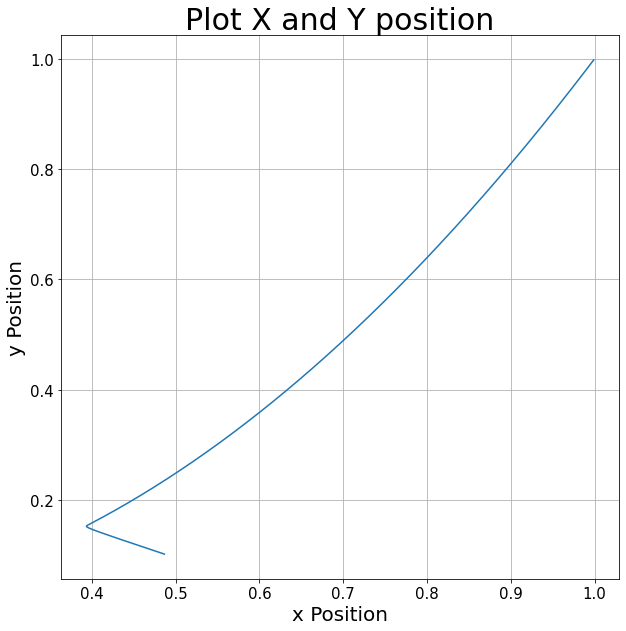

In [542]:
random.seed(42)
x = random.random()
y = random.random()
lr = 0.001
print(f"Initial x : {x}, y : {y}")
calculate_grad_descent(x, y, lr, 
                       step=100000, 
                       stop_crit_thresh=0.001)

Initial x : 0.6394267984578837, y : 0.025010755222666936
Steps count : 2
Final x : -1140571.0747208262, y : 570324.4479587047


[-1140571.0747208262, 570324.4479587047]

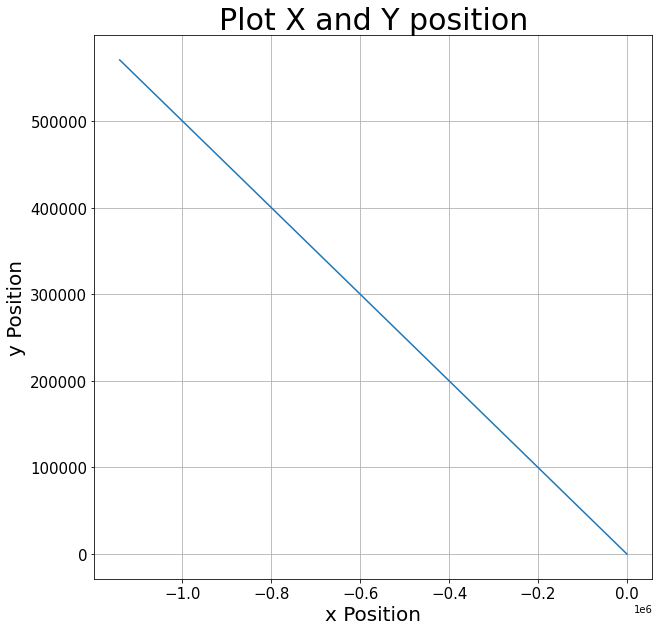

In [540]:
random.seed(42)
x = random.random()
y = random.random()
lr = 0.5
print(f"Initial x : {x}, y : {y}")
calculate_grad_descent(x, y, lr, step=100000, stop_crit_thresh=0.01)

### 1. 2. Newton's method

In [386]:
def f(x, y):
    return ((1-x)**2 + 100*(y-x**2)**2)
 
def dfx(x, y):
    return (400*(x**3)-400*x*y+2*x-2)

def dfy(x, y):
    return (200*(y-x**2))

def dfxfx(x, y):
    return (1200*(x**2)-400*y+2)

def dfyfy(x, y):
    return (200)

def dfxfy(x, y):
    return (-400 * x)

def dfyfx(x, y):
    return (-400 * x)

In [559]:
random.seed(42)
x0 = random.random()
y0 = random.random()

state = np.array([[x0], [y0]])

Initial x : 0.6394267984578837, y : 0.025010755222666936
Steps count : 127
Final x : 0.9999450422367553, y : 0.999888925317692


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

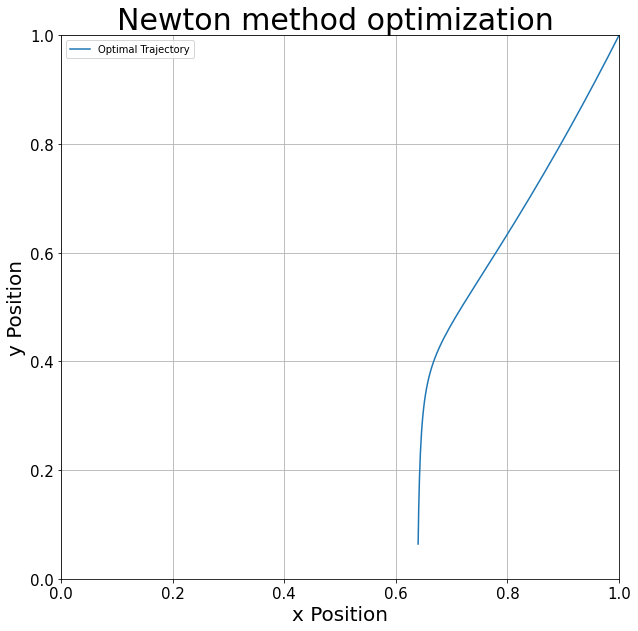

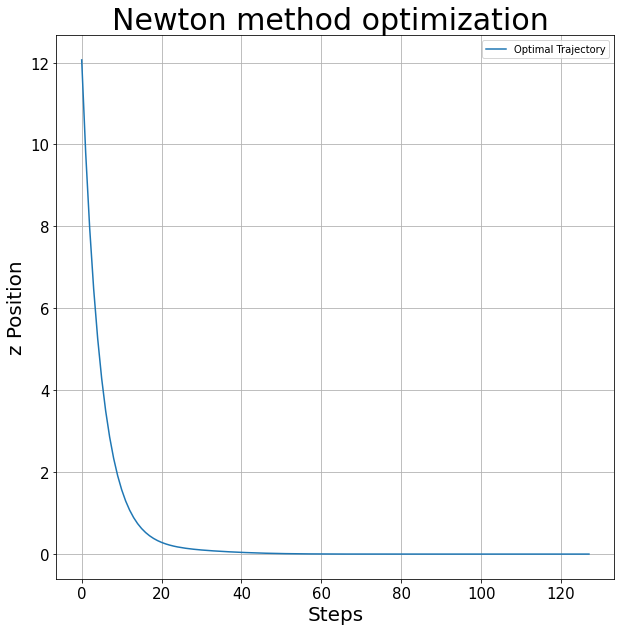

In [560]:
epsilon = 0.00001
x_step = []
y_step = []
z_step = []
temp_state = state
steps = 0
lr = 0.1

print(f"Initial x : {x0}, y : {y0}")

for i in range(10000):
    x0, y0 = state[:, 0]
    H_mat = np.array([[dfxfx(x0, y0), dfxfy(x0, y0)], [dfyfx(x0, y0), dfyfy(x0, y0)]])
    H_mat_inv = np.linalg.inv(H_mat) 
    delta = np.array([[dfx(x0, y0)],[dfy(x0, y0)]])

    state = state - lr * H_mat_inv.dot(delta)
    x_step.append(state[0][0])
    y_step.append(state[1][0])
    z_step.append(f(state[0][0], state[1][0]))
    
    if(abs(np.average(state - temp_state)) < epsilon):
        break
    
    temp_state = state
    steps += 1
    
print(f'Steps count : {steps}')
print(f"Final x : {state[0][0]}, y : {state[1][0]}")

plt.figure(figsize=(10,10))
plt.grid()
plt.plot(x_step, y_step)
plt.legend(['Optimal Trajectory'])
plt.title('Newton method optimization ', fontsize=30)
plt.xlabel('x Position', fontsize=20)
plt.ylabel('y Position', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.figure(figsize=(10,10))
plt.grid()
plt.plot(z_step)
plt.legend(['Optimal Trajectory'])
plt.title('Newton method optimization ', fontsize=30)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('z Position', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.xlim([0, 1])
# plt.ylim([0, 1])